# TP1 - Linear Regression

___
### Q.1

In [72]:
import pandas as pd
#sep = delimiter = ' '
fields = []
data = pd.read_csv("./invest.txt", sep=' ', usecols= all)
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


___
### Q.2

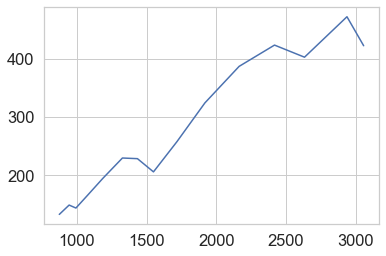

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
gnp=data["gnp"] # Gross National Product 
investment=data["invest"]
plot = plt.plot(gnp, investment)

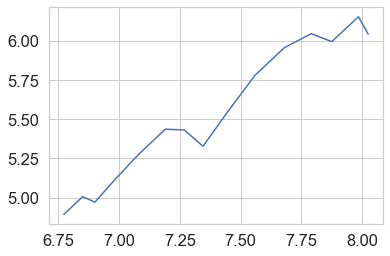

In [74]:
import numpy as np
log_gnp = np.log(np.array(gnp))
log_investment = np.log(np.array(investment))
plot = plt.plot(log_gnp, log_investment)

___
### Q.3
#### Estimate the intercept ($\beta_0$), the slope ($\beta_1$) and the determination coefficient ($R^2$)

In [75]:
x = log_gnp
Y = log_investment
xavg = np.average(x)
Yavg = np.average(Y)
beta1 = slope = np.dot(np.subtract(x, xavg), np.subtract(Y, Yavg)) / np.sum(np.power(np.subtract(x, xavg), 2))
beta0 = intercept = Yavg - beta1*xavg

y = prediction =  beta0 + beta1*x

R2 = determination = np.sum(np.power(np.subtract(y, Yavg), 2)) / np.sum(np.power(np.subtract(Y, Yavg), 2))
#other formula:      #R2 = 1 - np.dot(Y - y, Y - y) / np.dot(Y - Yavg, Y - Yavg)
print("The intercept is   ", beta0, "\nThe slope is        ", beta1)
print("The determination is", R2)

The intercept is    -1.9635913352301815 
The slope is         1.015281401598871
The determination is 0.9627572956057854


___
### Q.4
#### Test the significance of the slope $\beta_1$ using student-t test, report p-value. 

In [115]:
from scipy.stats import t
n = len(data)
p = 1
alpha5 = 0.05
tquantile = t.ppf(1 - alpha/2 , n - p - 1)
sigma2 = canonicalVariance = np.dot(Y - y, Y - y) / (n - 2)
beta1Var = slopeVariance = sigma2 / np.dot(x - xavg, x - xavg)
studentTTestSlope = beta1 / np.sqrt(beta1Var)
studentTTestSlope, tquantile

(18.331984456866678, 2.1603686564610127)

In [113]:
# p-value is Prob(real beta1 / np.sqrt(beta1Var) > studentTTestSlope | H0 which means beta)
pvalue = t.pdf(studentTTestSlope, n - p - 1)
pvalue

3.889151823944182e-11

___
### Q.5
#### For the GNP value 1000, estimate the necessary Investment, provide conﬁdence and prediction intervals for the 90% level

In [102]:
# GNP value 1000 corresponds in Logarithm to:
gnpval = math.log(1000)
predictionval = beta0 + beta1 * gnpval
print("The necessary investment to reach a GNP of 1000 is", predictionval)

The necessary investment to reach a GNP of 1000 is 5.049724126316802


In [153]:
#confidence interval
alpha10 = 0.1
tquantile = t.ppf(1 - alpha/2 , n - p - 1)
CIterm = tquantile * np.sqrt(sigma2 * (1/n + np.power(gnpval - xavg, 2) / np.dot(x - xavg, x - xavg))) 
CI = beta0 + beta1 * gnpval + np.array([-CIterm, CIterm])
PIterm = tquantile * np.sqrt(sigma2 * (1 + 1/n + np.power(gnpval - xavg, 2) / np.dot(x - xavg, x - xavg))) 
PI = beta0 + beta1 * gnpval + np.array([-PIterm, PIterm])
print("The confidance interval is", CI)
print("The prediction interval is", PI)

The confidance interval is [4.97469847 5.12474978]
The prediction interval is [4.84611715 5.2533311 ]


___
### Q.6
#### On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the conﬁdence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.

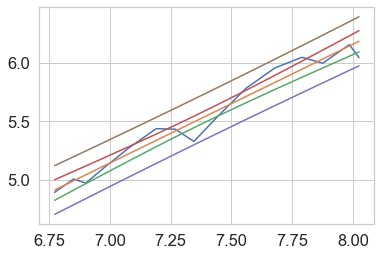

In [158]:
CI = []; PI = []
for val in x:
    CIterm = tquantile * np.sqrt(sigma2 * (1/n + np.power(val - xavg, 2) / np.dot(x - xavg, x - xavg))) 
    CI = CI + [beta0 + beta1 * val + np.array([-CIterm, CIterm])]
    
    PIterm = tquantile * np.sqrt(sigma2 * (1 + 1/n + np.power(val - xavg, 2) / np.dot(x - xavg, x - xavg))) 
    PI = PI + [beta0 + beta1 * val + np.array([-PIterm, PIterm])]
    
plot = plt.plot(x, Y, x, y, x, CI, x, PI)

___
### Q.7
#### Estimate the intercept, the slope, and the determination coeﬃcient and predict the necessary Investment for the GNP value 1000 using the class LinearRegression() from sklearn.linear_model 
#### Report the estimated values and make sure that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [135]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x2d = x.reshape(-1, 1)
reg.fit(x2d, Y)

LinearRegression()

In [149]:
print(reg.intercept_,float(reg.coef_))
print(beta0,beta1)

-1.9635913352301815 1.015281401598871
-1.9635913352301815 1.015281401598871


We note the perfect match.

___
### Q.8
#### On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the regression line and the predicted point (in a diﬀerent color). The graphic should coincide with the corresponding elements from the one in Step 6.

___
### Q.9 Regression of Investment on GNP and interest
#### Calculate Gram matrix, deduce its rank

In [251]:
z1 = log_gnp
z2 = np.array(data["interest"])
Y  = log_investment
Z = np.array([np.ones(n), z1, z2]).T
# Gram matrix G = Z*Z.T / n
G = np.dot(Z, Z.T) / n
print("the Gram matrix is of shape", G.shape)
#G

the Gram matrix is of shape (15, 15)


In [255]:
eigvals = np.linalg.eigvals(G).real
eigvals = [x if x>0.00000000000001 else 0 for x in eigvals]
print("The eigen values are", eigvals)
if 0 in eigvals:
    print("G is not full rank!")
    print("It's rank is", n - sum([x == 0 for x in eigvals]))
else:
    print("G is full rank!")
    print("It's rank is", n)

The eigen values are [115.85812691178226, 2.747602415286275, 0.001215797979872617, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
G is not full rank!
It's rank is 3


___
### Q.10
#### Calculate the coefficients...

In [ ]:
z1avg = np.average(z1)
z2avg = np.average(z2)
Yavg = np.average(Y)
beta = [0, 0, 0]
p= 2
for i in range(1,p):
    beta[i] = np.dot(np.subtract(Z.T[i], z2avg), np.subtract(Y, Yavg)) / np.sum(np.power(np.subtract(z2, z2avg), 2))
beta[0] = interceptt = Yavg - beta1*z1avg - beta2*z2avg

y = prediction =  beta0 + beta1*x

R2 = determination = np.sum(np.power(np.subtract(y, Yavg), 2)) / np.sum(np.power(np.subtract(Y, Yavg), 2))
#other formula:      #R2 = 1 - np.dot(Y - y, Y - y) / np.dot(Y - Yavg, Y - Yavg)
print("The intercept is   ", beta0, "\nThe slope is        ", beta1)
print("The determination is", R2)

array([6.77239364, 6.85012617, 6.9004285 , 6.98249163, 7.07825726,
       7.19022378, 7.26836248, 7.34549395, 7.4489161 , 7.55919466,
       7.67966743, 7.79061331, 7.87591714, 7.98538224, 8.02535287])

In [249]:
Z = np.array([np.ones(n), z1, z2]).T

In [250]:
Z

array([[ 1.        ,  6.77239364,  5.16      ],
       [ 1.        ,  6.85012617,  5.87      ],
       [ 1.        ,  6.9004285 ,  5.95      ],
       [ 1.        ,  6.98249163,  4.88      ],
       [ 1.        ,  7.07825726,  4.5       ],
       [ 1.        ,  7.19022378,  6.44      ],
       [ 1.        ,  7.26836248,  7.83      ],
       [ 1.        ,  7.34549395,  6.25      ],
       [ 1.        ,  7.4489161 ,  5.5       ],
       [ 1.        ,  7.55919466,  5.46      ],
       [ 1.        ,  7.67966743,  7.46      ],
       [ 1.        ,  7.79061331, 10.28      ],
       [ 1.        ,  7.87591714, 11.77      ],
       [ 1.        ,  7.98538224, 13.42      ],
       [ 1.        ,  8.02535287, 11.02      ]])